## Хід виконання роботи

##### Практична робота №4

1) Виберіть декілька метрик для ваших моделей для оптимізації гіперпараметрів.
2) Виберіть метод оптимізації гіперпараметрів, гіперпараметри та їх можливі значення. Опишіть основи такого рішення.
3) Здійсніть оптимізацію гіперпараметрів моделі на основі обраних метрик та гіперпараметрів.
4) Оберіть оптимальний результат.
5) Поясніть результати пошуку гіперпараметрів моделі відповідно до ваших метрик.
6) Застосуйте підходи роботи з незбалансованими класами якщо є така необхідність. Обгрунтуйте свій вибір.





## Індивідуальне завдання

##### 6 варіант https://www.kaggle.com/datasets/adilashrafi/bank-marketing-classification-task

Опис Компанії-Замовника: HSBC Holdings plc: Міжнародний банківський конгломерат, який активно використовує цифровий маркетинг та персоналізовані кампанії для просування своїх продуктів.

Запит: Банк шукає способи для підвищення результативності своїх маркетингових кампаній, зокрема в контексті залучення клієнтів до нових банківських продуктів.

Пропозиція Реалізації: Розробка класифікаційної моделі машинного навчання для прогнозування реакції потенційних клієнтів на різні маркетингові ініціативи. Вона повинна оцінювати ефективність різних підходів, враховуючи демографічні дані клієнтів, їхню історію взаємодій з банком, а також відгуки на попередні рекламні акції. Це допоможе банку більш цілеспрямовано підходити до своїх клієнтів, збільшуючи ефективність маркетингових заходів та залучення нових клієнтів.

Додаю всі бібліотеки, які будуть застосовуватися

In [2]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# for Q-Q plots
import scipy.stats as stats
# from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

from sklearn import metrics

from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV


from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter('ignore')

In [3]:
ds = pd.read_csv("D:\\3Kurs\\1Sem\\SS\\DataSet\\variant_6_cleaned.csv")
ds.head()
# ds.nunique()

,job,marital,balance,day,month,pdays,age_median,duration_end_of_distribution_imputation,campaign_0,previous_mean,...,housing_no,housing_yes,contact_cellular,contact_telephone,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success
0,0.000000,0.0,0.344313,0.600000,0.015483,0.000000,0.161765,0.059011,0.04,0.00,...,1,0,1,0,1,0,0,0,0,0
1,0.090909,0.0,0.636877,0.333333,0.293962,0.627306,0.205882,0.171451,0.04,0.16,...,0,1,1,0,0,1,0,1,0,0
2,0.181818,0.5,0.301725,0.500000,0.060164,0.610701,0.235294,0.143541,0.04,0.04,...,0,1,1,0,0,0,1,1,0,0
3,0.181818,0.0,0.314004,0.066667,0.106835,0.000000,0.161765,0.154705,0.16,0.00,...,0,1,0,0,0,0,1,0,0,0
4,0.272727,0.0,0.170159,0.133333,0.293962,0.000000,0.588235,0.176236,0.04,0.00,...,0,1,0,0,0,1,0,0,0,0


In [4]:
print(ds['y_yes'].value_counts())
print("no - ", round(((ds['y_yes']==0).sum()*100)/ds['y_yes'].count(), 2), "%")
print("yes - ", round(((ds['y_yes']==1).sum()*100)/ds['y_yes'].count(), 2), "%")

y_yes
0.0    3774
1.0     450
Name: count, dtype: int64
no -  89.35 %
yes -  10.65 %


Спочатку знайду гіперпараметри для вибраного методу (GradientBoostingClassifier), а потім справлюся з не збалансоаними класами, для получення кращого результату моделі

In [5]:
X = ds.drop(['y_yes'], axis=1)
y= ds['y_yes']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8)


In [7]:
gb_model = GradientBoostingClassifier()

gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94       752
         1.0       0.58      0.32      0.41        93

    accuracy                           0.90       845
   macro avg       0.75      0.65      0.68       845
weighted avg       0.88      0.90      0.89       845



In [8]:
gb_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [9]:
# Параметри для випадкового пошуку
param_dist = {
    'n_estimators': np.arange(100, 500, 50),
    'learning_rate': np.logspace(-3, 0, 10),
    'max_depth': np.arange(3, 8),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5),
    'subsample': np.linspace(0.6, 1.0, 5),
    'max_features': ['auto', 'sqrt', 'log2']
}

gb = GradientBoostingClassifier()

# Створюємо об'єкт RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gb, 
                    param_distributions=param_dist, 
                    scoring='f1', 
                    cv=5,
                    verbose = 3,
                    return_train_score=True)

# Навчаємо на тренувальних даних
random_search.fit(X_train, y_train)

# Отримуємо найкращі параметри
print("Найкращі параметри:", random_search.best_params_)

# Прогнозуємо на тестових даних
y_pred = random_search.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.46415888336127775, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=100, subsample=0.7;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END learning_rate=0.46415888336127775, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=100, subsample=0.7;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END learning_rate=0.46415888336127775, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=100, subsample=0.7;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END learning_rate=0.46415888336127775, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=100, subsample=0.7;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END learning_rate=0.46415888336127775, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimato

In [10]:
best_gb_model = GradientBoostingClassifier(
    n_estimators= 300,
    learning_rate= 0.1,
    max_depth= 5,
    min_samples_split= 3,
    min_samples_leaf= 2,
    subsample= 1.0,
    max_features= 'log2'
)

best_gb_model.fit(X_train, y_train)
y_pred = best_gb_model.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       752
         1.0       0.58      0.39      0.46        93

    accuracy                           0.90       845
   macro avg       0.75      0.68      0.71       845
weighted avg       0.89      0.90      0.89       845



### Підхід - збільшення прикладів мінорних класів (SMOTE)

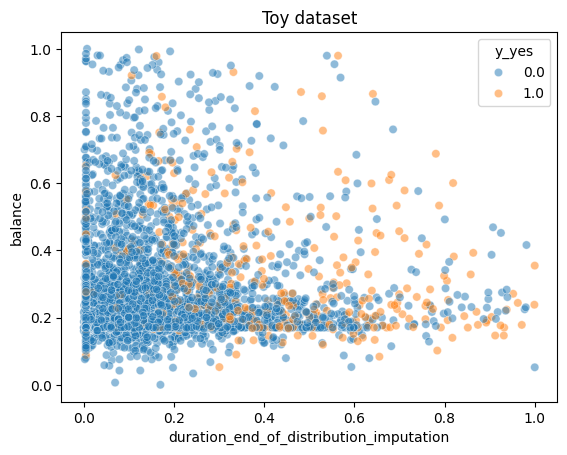

In [11]:
sns.scatterplot(
    data=X, x="duration_end_of_distribution_imputation", y="balance", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

In [12]:
sm = SMOTE(
    sampling_strategy='auto',  # samples only the minority class
    random_state=0,  # for reproducibility
    k_neighbors=5,
    n_jobs=4
)

X_res, y_res = sm.fit_resample(X, y)

In [13]:
X.shape, y.shape

((4224, 22), (4224,))

In [14]:
X_res.shape, y_res.shape

((7548, 22), (7548,))

In [15]:
y.value_counts(), y_res.value_counts()

(y_yes
 0.0    3774
 1.0     450
 Name: count, dtype: int64,
 y_yes
 0.0    3774
 1.0    3774
 Name: count, dtype: int64)

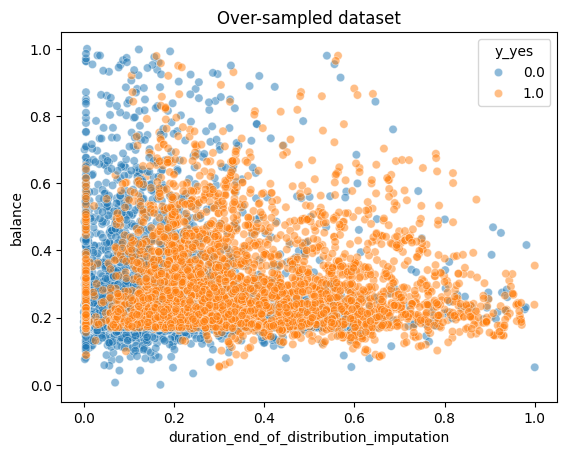

In [16]:
sns.scatterplot(
    data=X_res, x="duration_end_of_distribution_imputation", y="balance", hue=y_res, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()

In [17]:
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X,y, train_size=0.8)


In [18]:
best_gb_model1 = GradientBoostingClassifier(
    n_estimators= 300,
    learning_rate= 0.1,
    max_depth= 5,
    min_samples_split= 3,
    min_samples_leaf= 2,
    subsample= 1.0,
    max_features= 'log2'
)

best_gb_model1.fit(X_res_train, y_res_train)
y_res_pred = best_gb_model1.predict(X_res_test)

print(metrics.classification_report(y_res_test, y_res_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94       742
         1.0       0.68      0.33      0.44       103

    accuracy                           0.90       845
   macro avg       0.80      0.65      0.69       845
weighted avg       0.88      0.90      0.88       845



### Підхід - зменшення прикладів переважаючих класів (undersampling)

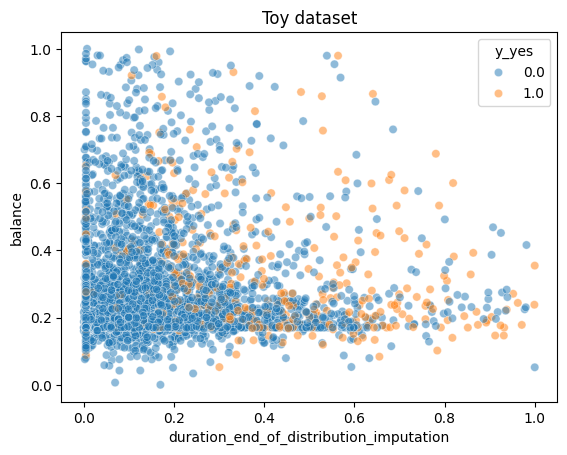

In [19]:
sns.scatterplot(
    data=X, x="duration_end_of_distribution_imputation", y="balance", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

In [20]:
# set up the random undersampling class

rus = RandomUnderSampler(
    sampling_strategy='auto',  # samples only the majority class
    random_state=0,  # for reproducibility
    replacement=True # if it should resample with replacement
)  

X_resampled, y_resampled = rus.fit_resample(X, y)

In [21]:
X.shape, y.shape

((4224, 22), (4224,))

In [22]:
X_resampled.shape, y_resampled.shape

((900, 22), (900,))

In [23]:
y.value_counts(), y_resampled.value_counts()

(y_yes
 0.0    3774
 1.0     450
 Name: count, dtype: int64,
 y_yes
 0.0    450
 1.0    450
 Name: count, dtype: int64)

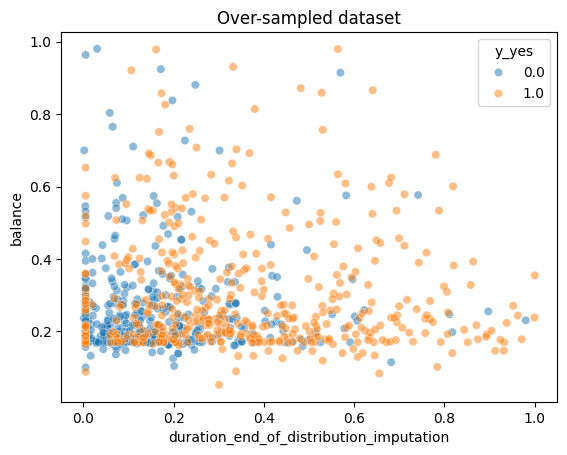

In [24]:
sns.scatterplot(
    data=X_resampled, x="duration_end_of_distribution_imputation", y="balance", hue=y_resampled, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()

In [25]:
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X,y, train_size=0.8)


In [26]:
best_gb_model2 = GradientBoostingClassifier(
    n_estimators= 300,
    learning_rate= 0.1,
    max_depth= 5,
    min_samples_split= 3,
    min_samples_leaf= 2,
    subsample= 1.0,
    max_features= 'log2'
)

best_gb_model2.fit(X_resampled_train, y_resampled_train)
y_resampled_pred = best_gb_model2.predict(X_resampled_test)

print(metrics.classification_report(y_resampled_test, y_resampled_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95       757
         1.0       0.55      0.32      0.40        88

    accuracy                           0.90       845
   macro avg       0.74      0.64      0.67       845
weighted avg       0.89      0.90      0.89       845



In [27]:
y_resampled_pred

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### Висновок: 
#### Для кінцевої моделі я вибрала другу модель, до якої я застосовувала метод зменшення прикладів переважаючих класів, адже так як для оптимізції гіперпараметрів я використовувала метрику f1, то в другому методі він показав кращий результат як для 0 та і особливо для 1.